In [1]:
#Standard Libraries
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings("ignore")

### _Some useful constants_

In [2]:
h = 6.626e-34  #PLanck constant, J*s
kb = 1.381e-23 #Boltzmann constant,  J*(K*mol)^-1
kw = 2897.0     #Wien's constant,   um*K (micron*K)
c = 3e8    #Speed of Light in vaacuum,  m*s^-1
sigma = 5.67e-8 #Stefan-Boltzmann constant,  W*m^-2*K^-4 

# PROBLEM 1

### _calculating Planks function_

In [3]:
T = 5780
planks_function = lambda T, wavelength: 2*h*(c**2)/(((wavelength*(10**-6))**4)*wavelength*np.expm1(h*c/(kb*(wavelength*(10**-6))*T)))
plnk = lambda wavelength: planks_function(5780, wavelength) #got help from Eden

In [4]:
x_wave = np.linspace(-2, 8, 200)
B = planks_function(T, 10**x_wave)
wavelength = 10**x_wave # got help from Katie

### _calculating the percentage of total emission_

In [5]:
#Eden helped me on this
flux = sigma*(T**4) #max emission for a blackbody at 5780 K
ex_UV = ((integrate.quad(plnk, 0.01, 0.1)[0])*np.pi)/flux*100 #integrate between 0.01 and 0.1 and etc for below,
far_UV = ((integrate.quad(plnk, 0.1, 0.2)[0])*np.pi)/flux*100 #multiply by pi for steradian conversion and multiply by 100 for %
UVC = ((integrate.quad(plnk, 0.2, 0.28)[0])*np.pi)/flux*100
UVB = ((integrate.quad(plnk, 0.28, 0.32)[0])*np.pi)/flux*100
UVA = ((integrate.quad(plnk, 0.32, 0.4)[0])*np.pi)/flux*100
Visible = ((integrate.quad(plnk, 0.4, 0.7)[0])*np.pi)/flux*100
near_IR = ((integrate.quad(plnk, 0.7, 4)[0])*np.pi)/flux*100
thermal_IR = ((integrate.quad(plnk, 4, 50)[0])*np.pi)/flux*100

### _plot 1_

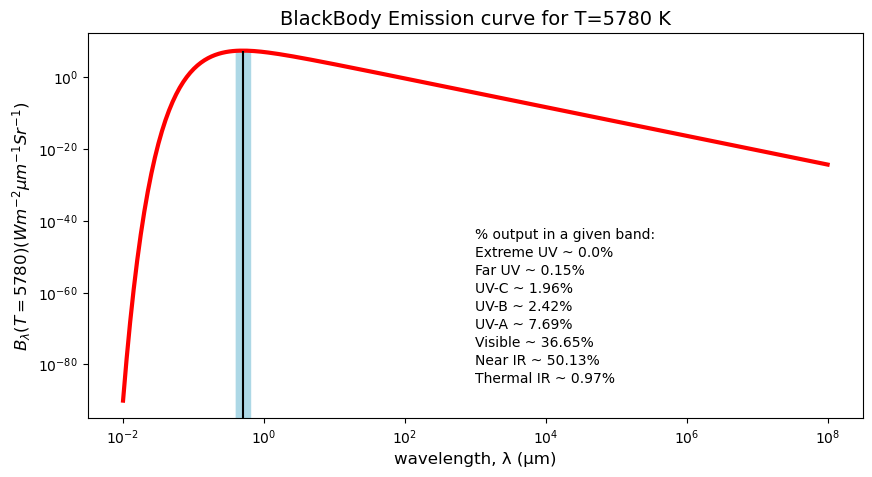

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
# x and y ticks
x_tick = np.arange(-2, 8.01, 2); x_ticks = 10**x_tick
y_tick = np.arange(-100, 20.01, 20); y_ticks = 10**y_tick

# xmax and ymax
x_max = kw/T
ymax = np.interp(x_max, 10**x_wave, B)

ax.loglog(wavelength, B, color='red', linewidth=3)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_title('BlackBody Emission curve for T=5780 K', fontsize=14,)
ax.set_xlabel('wavelength, \u03BB (\u03BCm)', fontsize=12)
ax.set_ylabel(r'$B_{λ}(T=5780)  (Wm^{-2}μm^{-1}Sr^{-1})$', fontsize=12)
ax.vlines(x=x_max, ymin=0, ymax=ymax, colors='k', linestyles='solid')
ax.fill_between(wavelength, B, where=(4e-7<(wavelength*1e-6)) & ((wavelength*1e-6)<7e-7), color='lightblue' ) #Katie helped me
ax.text(10**3, 10**-45, '% output in a given band:')
ax.text(10**3, 10**-50, 'Extreme UV ~ '+ str(round(ex_UV, 2))+ '%')
ax.text(10**3, 10**-55, 'Far UV ~ ' +str(round(far_UV, 2))+ '%')
ax.text(10**3, 10**-60, 'UV-C ~ ' +str(round(UVC, 2))+ '%')
ax.text(10**3, 10**-65, 'UV-B ~ ' +str(round(UVB, 2))+ '%')
ax.text(10**3, 10**-70, 'UV-A ~ ' +str(round(UVA, 2))+ '%')
ax.text(10**3, 10**-75, 'Visible ~ '+str(round(Visible, 2))+'%')
ax.text(10**3, 10**-80, 'Near IR ~ ' +str(round(near_IR, 2))+'%')
ax.text(10**3, 10**-85, 'Thermal IR ~ '+str(round(thermal_IR, 2))+'%')
fig.savefig('./%s.jpg' %('images/noteng_lab7_blackbody-emissions_5780_plot1'),bbox_inches='tight', dpi=300)

### _plot2_

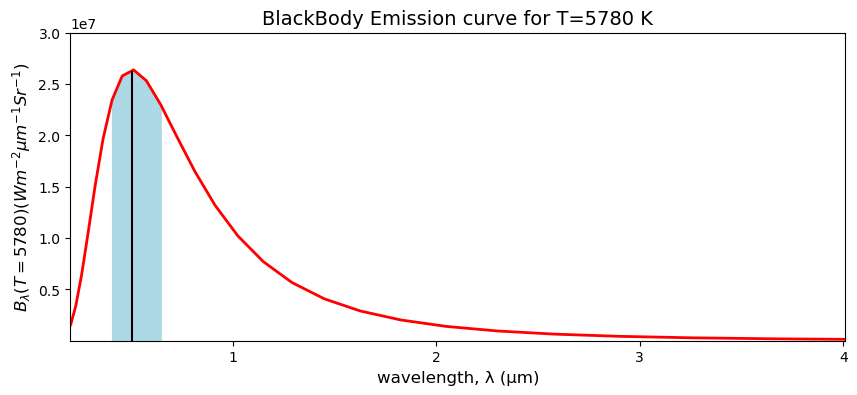

In [7]:
fig, ax = plt.subplots(figsize=(10, 4))

# # xmax and ymax
x_max = kw/T
ymax = np.interp(x_max, wavelength, B)

## setting x and y ticks values
x = [1,2,3,4]
y = [5.0e6, 1.0e7, 1.5e7, 2.0e7, 2.5e7, 3.0e7]

ax.plot(wavelength, B, color='red', linewidth=2)
ax.set_xticks(x)
ax.set_yticks(y)
ax.set_xlim(0.2, 4.01)
ax.set_ylim(0, 3.0e7)

ax.set_title('BlackBody Emission curve for T=5780 K', fontsize=14)
ax.set_xlabel('wavelength, \u03BB (\u03BCm)', fontsize=12)
ax.set_ylabel(r'$B_{λ}(T=5780)  (Wm^{-2}μm^{-1}Sr^{-1})$', fontsize=12)
ax.vlines(x=x_max, ymin=0, ymax=ymax, colors='k', linestyles='solid')
ax.fill_between(wavelength, B, where=(0.4<(wavelength)) & ((wavelength)<0.7), color='lightblue' )
plt.savefig('./%s.jpg' %('images/noteng_lab7_blackbody-emissions_5780_vis_plot2'),bbox_inches='tight', dpi=300)

# PROBLEM 2

### _plot3_

In [8]:
temperatures = [6000, 3000, 2000, 1000, 500, 250, 100]
BB = planks_function(temperatures[0], wavelength)
BB1 = planks_function(temperatures[1], wavelength)
BB2 = planks_function(temperatures[2], wavelength)
BB3 = planks_function(temperatures[3], wavelength)
BB4 = planks_function(temperatures[4], wavelength)
BB5 = planks_function(temperatures[5], wavelength)
BB6 = planks_function(temperatures[6], wavelength)

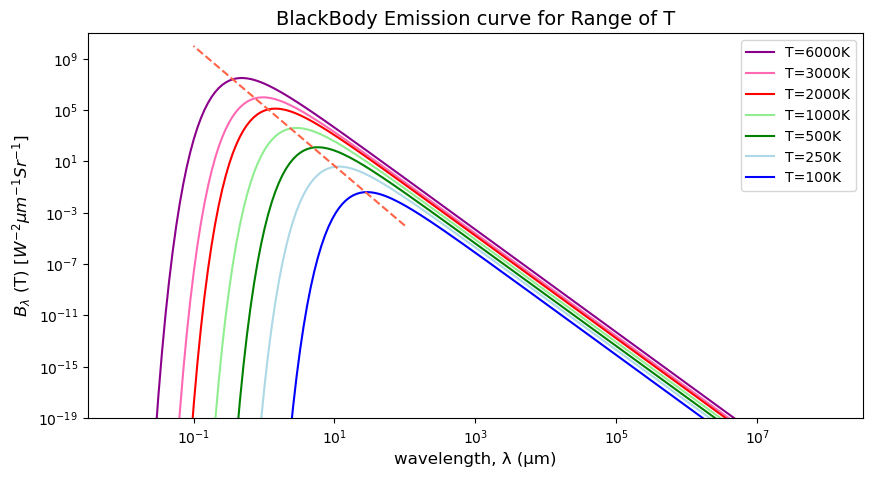

In [9]:

fig, ax = plt.subplots(figsize=(10, 5))
# x and y ticks
x_tick = np.arange(-2, 8.01, 2); x_ticks = 10**x_tick
# y_tick = np.arange(-20, 10.01, 2); y_ticks = 10**y_tick
y_ticks = [10e-20, 10e-15, 10e-10, 10e-5, 10e0, 10e5, 10e10]
ax.set_ylim(10e-20, 10e10)
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax1= ax.loglog(wavelength, BB, label='T=6000K',  color='darkmagenta')
ax2= ax.loglog(wavelength, BB1, label='T=3000K',  color='hotpink')
ax3= ax.loglog(wavelength, BB2, label='T=2000K',  color='red')
ax4= ax.loglog(wavelength, BB3, label='T=1000K',  color='lightgreen')
ax5= ax.loglog(wavelength, BB4, label='T=500K',  color='green')
ax6= ax.loglog(wavelength, BB5, label='T=250K', color='lightblue')
ax7= ax.loglog(wavelength, BB6, label='T=100K', color='blue')
ax.legend()

ax.set_title('BlackBody Emission curve for Range of T', fontsize=14)
ax.set_xlabel('wavelength, \u03BB (\u03BCm)', fontsize=12)
ax.set_ylabel('$B_\lambda$ (T) $[W^{-2} \mu m^{-1} Sr^{-1}]$', fontsize=12)
ax.plot([10e1, 10e-2], [10e-5, 10e9], color='tomato', linestyle='--')
plt.savefig('./%s.jpg' %('images/noteng_lab7_blackbody-emissions_T-range_plot3'),bbox_inches='tight', dpi=300)

# PROBLEM 3

### _Rayleigh-jean's approximation_

In [10]:
rayleigh = lambda T, wavelength: T*2*c*kb/(((wavelength*(10**-6))**3)*wavelength)

### _plot4_

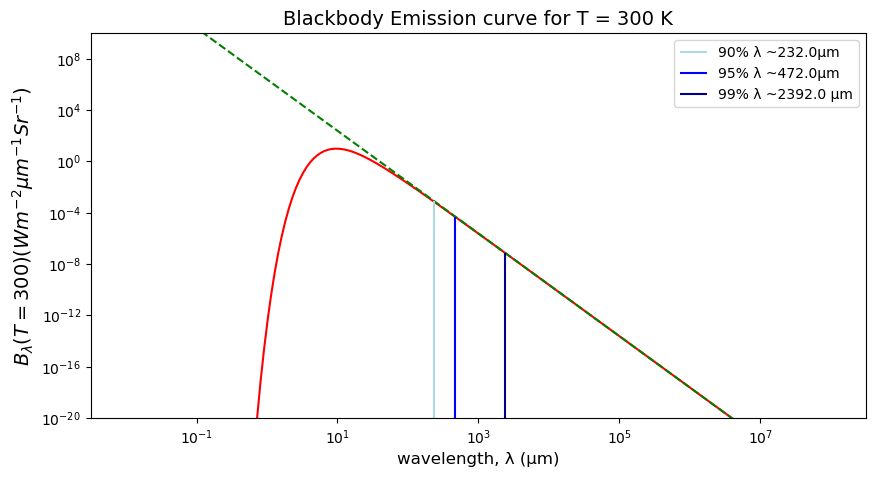

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(10**x_wave, planks_function(300, 10**x_wave), color='red')
ax.plot(10**x_wave, rayleigh(300, 10**x_wave), linestyle='--', color='green')
ax.set_ylim(10**-20, 10**10)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Blackbody Emission curve for T = 300 K', fontsize=14)
ax.set_xlabel('wavelength, \u03BB (\u03BCm)', fontsize=12)
ax.set_ylabel(r'$B_{λ}(T=300)  (Wm^{-2}μm^{-1}Sr^{-1})$', fontsize=14)


#got help from Eden
#setting the wavelength percentages
y_max_plot5 = lambda variable: np.interp(variable, 10**x_wave, planks_function(300, 10**x_wave)) #set limit for striaight line
    
B90_300 = np.interp(.90, planks_function(300, 10**x_wave) / rayleigh(300, 10**x_wave), 10**x_wave) #find wavelength that's 90% and etc
plt.vlines(x=B90_300, ymin=0, ymax=y_max_plot5(B90_300), color='lightblue', label='90% \u03BB ~'+str(round((B90_300), 0))+'\u03BCm')
B95_300 = np.interp(.95, planks_function(300, 10**x_wave) / rayleigh(300, 10**x_wave), 10**x_wave)
plt.vlines(x=B95_300, ymin=0, ymax=y_max_plot5(B95_300), color='blue', label='95% \u03BB ~'+str(round((B95_300),0))+'\u03BCm')
B99_300 = np.interp(.99, planks_function(300, 10**x_wave) / rayleigh(300, 10**x_wave), 10**x_wave)
ax.vlines(x=B99_300, ymin=0, ymax=y_max_plot5(B99_300), color='darkblue', label='99% \u03BB ~'+str(round((B99_300),0))+' \u03BCm')
ax.legend()
fig.savefig('./%s.jpg' %('images/noteng_lab7_blackbody-emissions_6000_rayleigh_plot4'),bbox_inches='tight', dpi=300)